In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [7]:
#loading the data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [9]:
x=df[['highway-mpg']]
y=df[['price']]

In [48]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

  <b>Linear function:</b>
$$
Yhat = a + b  X
$$

In [13]:
lm.intercept_

array([38423.30585816])

In [14]:
lm.coef_

array([[-821.73337832]])

<h3>price = 38423.31 - 821.73 x  <b>highway-mpg</b></h3>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #1 b): </h1>

<b>Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?</b>
</div>

In [50]:
yhatslr=lm.predict(x)
yhatslr[0:5]   

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [18]:
x1=df[['engine-size' ]]
y=df[['price']]
lm.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
lm.coef_

array([[166.86001569]])

In [20]:
lm.intercept_

array([-7963.33890628])

<h3>price = -7963.33890628 +166.86001569 x  <b>engine-size</b></h3>

(0, 48272.624405809605)

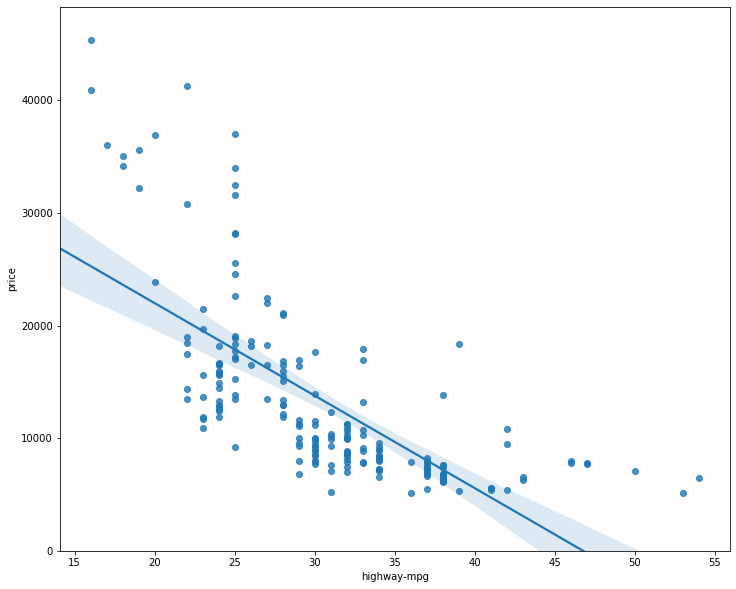

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 56216.18151856862)

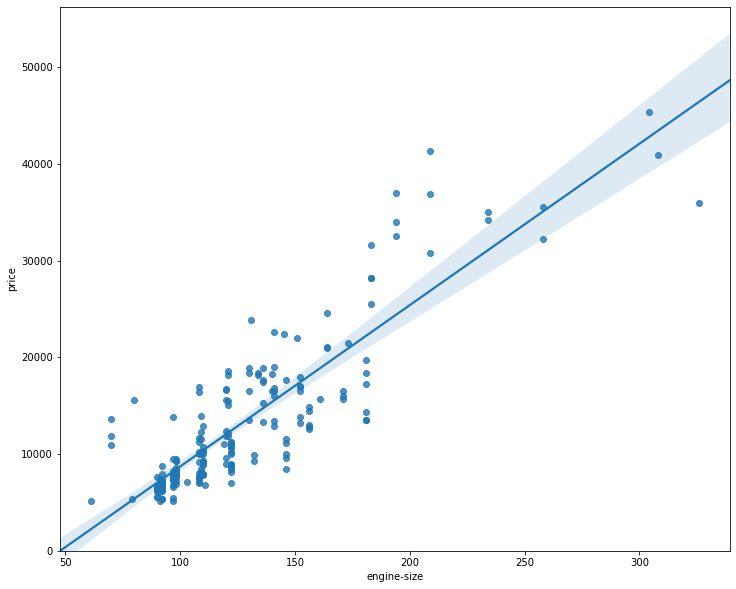

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<h4>Multiple Linear Regression</h4>

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [30]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [31]:
lm.fit(z,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [33]:
lm.intercept_

array([-15806.62462633])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [41]:
yhatmlr=lm.predict(z)

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

(0, 47422.919330307624)

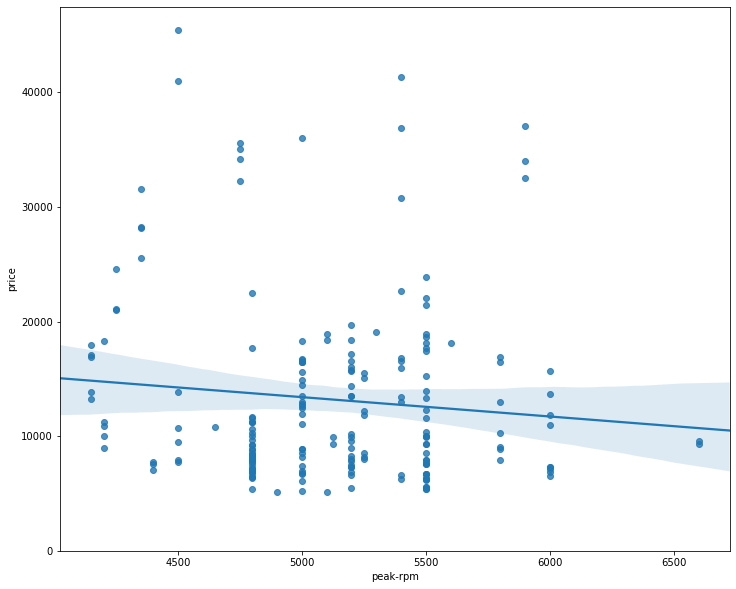

In [36]:
# SLR peak-rpm and price
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Given the regression plots above is "peak-rpm" or "highway-mpg" more strongly correlated with "price". Use the method  ".corr()" to verify your answer.</b>
</div>

In [37]:
df[["peak-rpm","highway-mpg" ,"price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


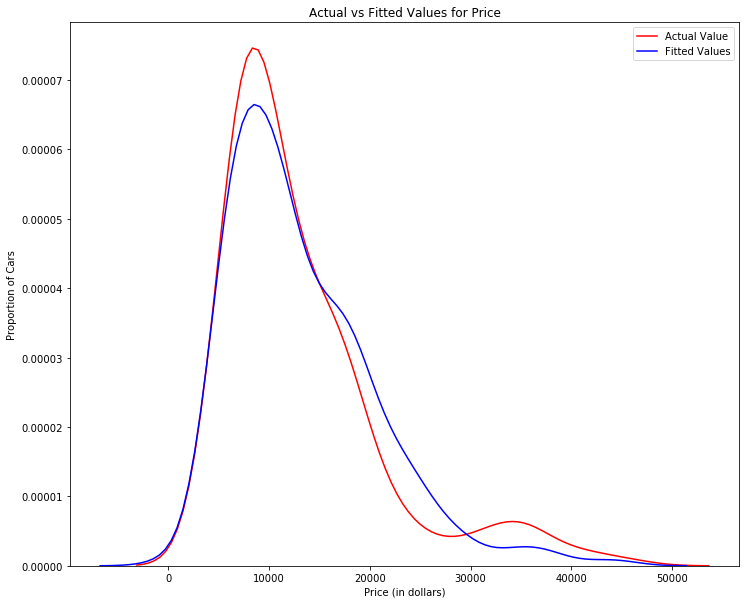

In [42]:
#MLR plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhatmlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

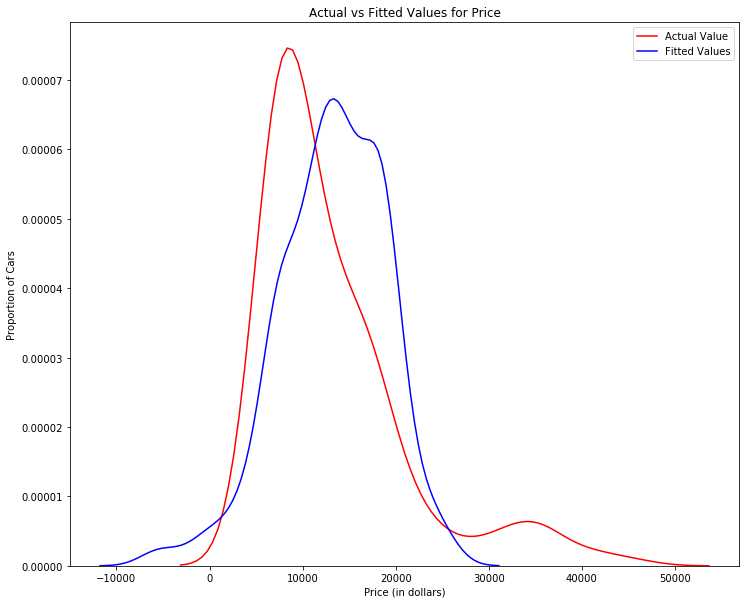

In [51]:
#SLR plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhatslr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<h2>Part 3: Polynomial Regression and Pipelines</h2>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [52]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [53]:
x = df['highway-mpg']
y = df['price']

In [56]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


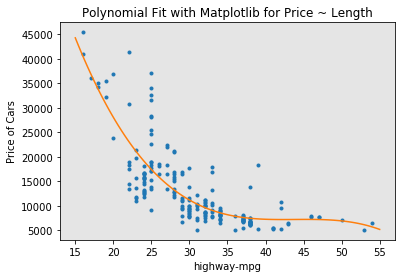

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question  #4:</h1>
<b>Create 11 order polynomial model with the variables x and y from above?</b>
</div>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

In [58]:
# Here we use a polynomial of the 11th order (cubic) 
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [61]:
z_pr=pr.fit_transform(Z)

In [62]:
z.shape #MLR shape

(201, 4)

In [64]:
z_pr.shape #PLR shape 

(201, 15)

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [72]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [73]:
pipe.fit(z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [69]:
ypipe=pipe.predict(z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #5:</h1>
<b>Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y</b>
</div>

In [75]:
input1 =[('scale' ,StandardScaler()),('model',LinearRegression())]

In [81]:
pipe1=Pipeline(input1 )

In [82]:
pipe1.fit(z ,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [83]:
pipe1.predict(z)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

<h2>Part 4: Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

In [90]:
#highway_mpg_fit Calculate R^2 value (between 0 and 1 , 0 poor 1-->good)
x=df[['highway-mpg']]
y=df[['price']]
lm.fit(x,y)
lm.score(x,y)

0.4965911884339176

In [91]:
from sklearn.metrics import mean_squared_error # MSE should be high
mean_squared_error(df['price'],yhatslr)

31635042.944639888

<h3>Model 2: Multiple Linear Regression</h3>

In [92]:
# fit the model 
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093562806577457


In [94]:
Y_predict_multifit=lm.predict(z)

In [95]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

In [96]:
from sklearn.metrics import r2_score

In [97]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7023769093756598


<h3>MSE</h3>

In [98]:
mean_squared_error(df['price'], p(x))

18703127.63085496

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [99]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [101]:
lm.fit(x, y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

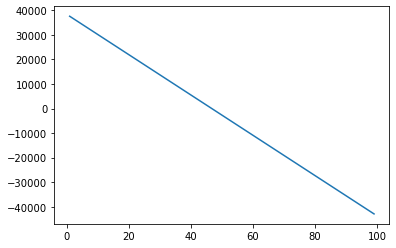

In [103]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>